In [39]:
## Dependencies and Setup
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import requests
import json
from pathlib import Path
from pprint import pprint
import scipy.stats as st

# created path for the csv files
EV_final_path = Path("Final_Resource/EV_final.csv")
# Read the mouse data and the study results
final_file_df = pd.read_csv(EV_final_path)
#display data
final_file_df

,State,Registrations of EV 2019,Registrations of EV 2020,Registrations of EV 2021,Total EV,YOY(2020-2021)Growth Percentage,2019 - No. EV charge outlets,2020 - No. EV charge outlets,2021 - No. EV charge outlets,Total charging outlets,EV:Charger outlets,Average fuel price(current),Capital,ST,Lat,Lon
0,Alabama,722,2890.0,4750.0,8362.0,64.40%,506.0,596.0,680.0,1782.0,4.69,$3.08,Montgomery,AL,32.366966,-86.300648
1,Alaska,87,940.0,1290.0,2317.0,37.23%,34.0,45.0,94.0,173.0,13.39,$4.31,Juneau,AK,58.301950,-134.419734
2,Arizona,6637,28770.0,40740.0,76147.0,41.61%,1476.0,1778.0,2257.0,5511.0,13.82,$3.79,Phoenix,AZ,33.448437,-112.074141
3,Arkansas,370,1330.0,2390.0,4090.0,79.70%,290.0,350.0,453.0,1093.0,3.74,$3.09,Little Rock,AR,34.746507,-92.289627
4,California,100549,425300.0,563070.0,1088919.0,32.40%,27128.0,34622.0,41225.0,102975.0,10.57,$4.87,Sacramento,CA,38.581061,-121.493895
5,Colorado,7124,24670.0,37000.0,68794.0,50.00%,2516.0,3234.0,3978.0,9728.0,7.07,$3.78,Denver,CO,39.739236,-104.984862
6,Connecticut,2383,9040.0,13350.0,24773.0,47.70%,1048.0,1240.0,1430.0,3718.0,6.66,$3.62,Hartford,CT,41.764582,-72.690855
7,Delaware,579,1950.0,3010.0,5539.0,54.40%,172.0,206.0,314.0,692.0,8.00,$3.47,Dover,DE,39.158168,-75.524368
8,Florida,13137,58160.0,95640.0,166937.0,64.44%,4562.0,5519.0,6723.0,16804.0,9.93,$3.46,Tallahassee,FL,30.438083,-84.280933
9,Georgia,4227,23530.0,34020.0,61777.0,44.58%,2939.0,3645.0,3939.0,10523.0,5.87,$3.26,Atlanta,GA,33.748992,-84.390264


In [40]:
#TOP 5 STATES WITH EV REGISTRATIONS

final_file_df.sort_values("Total EV", ascending= False).head()

,State,Registrations of EV 2019,Registrations of EV 2020,Registrations of EV 2021,Total EV,YOY(2020-2021)Growth Percentage,2019 - No. EV charge outlets,2020 - No. EV charge outlets,2021 - No. EV charge outlets,Total charging outlets,EV:Charger outlets,Average fuel price(current),Capital,ST,Lat,Lon
4,California,100549,425300.0,563070.0,1088919.0,32.40%,27128.0,34622.0,41225.0,102975.0,10.57,$4.87,Sacramento,CA,38.581061,-121.493895
8,Florida,13137,58160.0,95640.0,166937.0,64.44%,4562.0,5519.0,6723.0,16804.0,9.93,$3.46,Tallahassee,FL,30.438083,-84.280933
42,Texas,3460,52190.0,80900.0,136550.0,55.01%,4009.0,4802.0,5486.0,14297.0,9.55,$3.16,Austin,TX,30.271129,-97.743700
46,Washington,10256,50520.0,66810.0,127586.0,32.30%,3206.0,3771.0,4328.0,11305.0,11.29,$4.96,Olympia,WA,47.045102,-122.895008
31,New York,8830,32590.0,51870.0,93290.0,59.16%,4531.0,6092.0,7621.0,18244.0,5.11,$3.68,Albany,NY,42.651167,-73.754968


In [41]:
top5_EV_df=final_file_df.sort_values(by = "YOY(2020-2021)Growth Percentage",ascending = False).head()
top5_EV_df

,State,Registrations of EV 2019,Registrations of EV 2020,Registrations of EV 2021,Total EV,YOY(2020-2021)Growth Percentage,2019 - No. EV charge outlets,2020 - No. EV charge outlets,2021 - No. EV charge outlets,Total charging outlets,EV:Charger outlets,Average fuel price(current),Capital,ST,Lat,Lon
3,Arkansas,370,1330.0,2390.0,4090.0,79.70%,290.0,350.0,453.0,1093.0,3.74,$3.09,Little Rock,AR,34.746507,-92.289627
25,Montana,230,940.0,1650.0,2820.0,75.53%,137.0,188.0,212.0,537.0,5.25,$3.72,Helena,MT,46.592742,-112.036277
33,North Dakota,92,220.0,380.0,692.0,72.73%,46.0,101.0,139.0,286.0,2.42,$3.46,Bismarck,ND,46.808327,-100.783739
39,South Carolina,956,4390.0,7440.0,12786.0,69.50%,643.0,727.0,862.0,2232.0,5.73,$3.17,Columbia,SC,34.000749,-81.034331
47,West Virginia,179,600.0,1010.0,1789.0,68.33%,244.0,258.0,307.0,809.0,2.21,$3.36,Charleston,WV,38.350600,-81.633281


In [42]:
#TOP 5 STATES WITH HIGHEST NO OF CHARGING OUTLETS

final_file_df.sort_values(by = "Total charging outlets",ascending = False).head()

,State,Registrations of EV 2019,Registrations of EV 2020,Registrations of EV 2021,Total EV,YOY(2020-2021)Growth Percentage,2019 - No. EV charge outlets,2020 - No. EV charge outlets,2021 - No. EV charge outlets,Total charging outlets,EV:Charger outlets,Average fuel price(current),Capital,ST,Lat,Lon
4,California,100549,425300.0,563070.0,1088919.0,32.40%,27128.0,34622.0,41225.0,102975.0,10.57,$4.87,Sacramento,CA,38.581061,-121.493895
31,New York,8830,32590.0,51870.0,93290.0,59.16%,4531.0,6092.0,7621.0,18244.0,5.11,$3.68,Albany,NY,42.651167,-73.754968
8,Florida,13137,58160.0,95640.0,166937.0,64.44%,4562.0,5519.0,6723.0,16804.0,9.93,$3.46,Tallahassee,FL,30.438083,-84.280933
42,Texas,3460,52190.0,80900.0,136550.0,55.01%,4009.0,4802.0,5486.0,14297.0,9.55,$3.16,Austin,TX,30.271129,-97.743700
46,Washington,10256,50520.0,66810.0,127586.0,32.30%,3206.0,3771.0,4328.0,11305.0,11.29,$4.96,Olympia,WA,47.045102,-122.895008


In [43]:
#top 5 states with the best Electric vehicles to charger ports ratio
final_file_df.sort_values(by = "EV:Charger outlets",ascending = False).head()

,State,Registrations of EV 2019,Registrations of EV 2020,Registrations of EV 2021,Total EV,YOY(2020-2021)Growth Percentage,2019 - No. EV charge outlets,2020 - No. EV charge outlets,2021 - No. EV charge outlets,Total charging outlets,EV:Charger outlets,Average fuel price(current),Capital,ST,Lat,Lon
29,New Jersey,7276,30420.0,47830.0,85526.0,57.23%,1297.0,1651.0,2008.0,4956.0,17.26,$3.52,Trenton,NJ,40.220594,-74.759722
2,Arizona,6637,28770.0,40740.0,76147.0,41.61%,1476.0,1778.0,2257.0,5511.0,13.82,$3.79,Phoenix,AZ,33.448437,-112.074141
1,Alaska,87,940.0,1290.0,2317.0,37.23%,34.0,45.0,94.0,173.0,13.39,$4.31,Juneau,AK,58.301950,-134.419734
10,Hawaii,2488,10670.0,14220.0,27378.0,33.30%,666.0,760.0,833.0,2259.0,12.12,$4.69,Honolulu,HI,21.304547,-157.855676
46,Washington,10256,50520.0,66810.0,127586.0,32.30%,3206.0,3771.0,4328.0,11305.0,11.29,$4.96,Olympia,WA,47.045102,-122.895008


In [44]:
#df[col] = df[col].replace('$', '')
#final_file_df['Average fuel price(current)'] = final_file_df['Average fuel price(current)'].replace('$', ' ')
#final_file_df['Average fuel price(current)'] = final_file_df['Average fuel price(current)'].astype(float)

#df['Salary'].str.replace('\$|,','', regex=True)
final_file_df['Average fuel price(current)'] = final_file_df['Average fuel price(current)'].str.replace('\$|,','', regex=True)

final_file_df.head()


#df[col] = df[col].astype(float) 

,State,Registrations of EV 2019,Registrations of EV 2020,Registrations of EV 2021,Total EV,YOY(2020-2021)Growth Percentage,2019 - No. EV charge outlets,2020 - No. EV charge outlets,2021 - No. EV charge outlets,Total charging outlets,EV:Charger outlets,Average fuel price(current),Capital,ST,Lat,Lon
0,Alabama,722,2890.0,4750.0,8362.0,64.40%,506.0,596.0,680.0,1782.0,4.69,3.08,Montgomery,AL,32.366966,-86.300648
1,Alaska,87,940.0,1290.0,2317.0,37.23%,34.0,45.0,94.0,173.0,13.39,4.31,Juneau,AK,58.301950,-134.419734
2,Arizona,6637,28770.0,40740.0,76147.0,41.61%,1476.0,1778.0,2257.0,5511.0,13.82,3.79,Phoenix,AZ,33.448437,-112.074141
3,Arkansas,370,1330.0,2390.0,4090.0,79.70%,290.0,350.0,453.0,1093.0,3.74,3.09,Little Rock,AR,34.746507,-92.289627
4,California,100549,425300.0,563070.0,1088919.0,32.40%,27128.0,34622.0,41225.0,102975.0,10.57,4.87,Sacramento,CA,38.581061,-121.493895


# scatter plots of ev sales vs average fuel price and show corealltaion.

The correlation between average fuel price and total EV 0.46


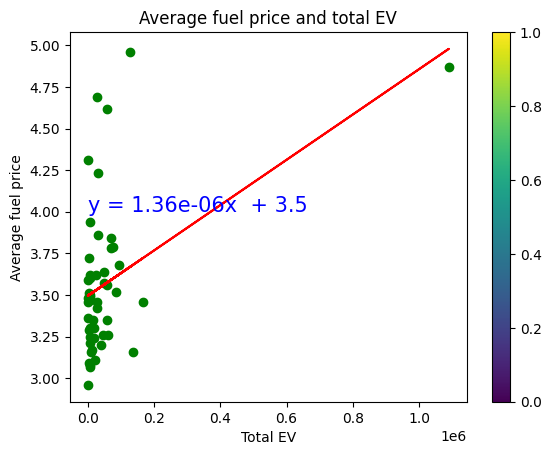

In [45]:
y_values =(final_file_df["Average fuel price(current)"].str.replace("$" , "").astype(float))
x_values = final_file_df["Total EV"]

# (slope, intercept,rvalue, pvalue, stderr)= st.linregress(y_values , x_values)
# regress_values=x_values* slope + intercept
# #line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
# #st.linregress(y_axis)
# #Regress_values = x_aixs*slope +intercept
# line_eq= "y = " + str(round(slope,0)) + "x +" + str(round(intercept, 1))

# plt.scatter(x_values,y_values)

# print(line_eq)
# plt.show()


correlation = st.pearsonr(x_values,y_values)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values*slope + intercept
line_eq = "y = "+ str(round(slope,8)) + "x  + " + str(round(intercept,2))
plot = plt.scatter(x_values,y_values,color="green",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.4,4),fontsize=15,color = "blue")
plt.xlabel("Total EV")
plt.ylabel("Average fuel price")
print(f"The correlation between average fuel price and total EV {round(correlation[0],2)}")
plt.title('Average fuel price and total EV')
plt.savefig('Output_Data/EV sales vs fuel price1_plot.png')
plt.colorbar()

plt.show()


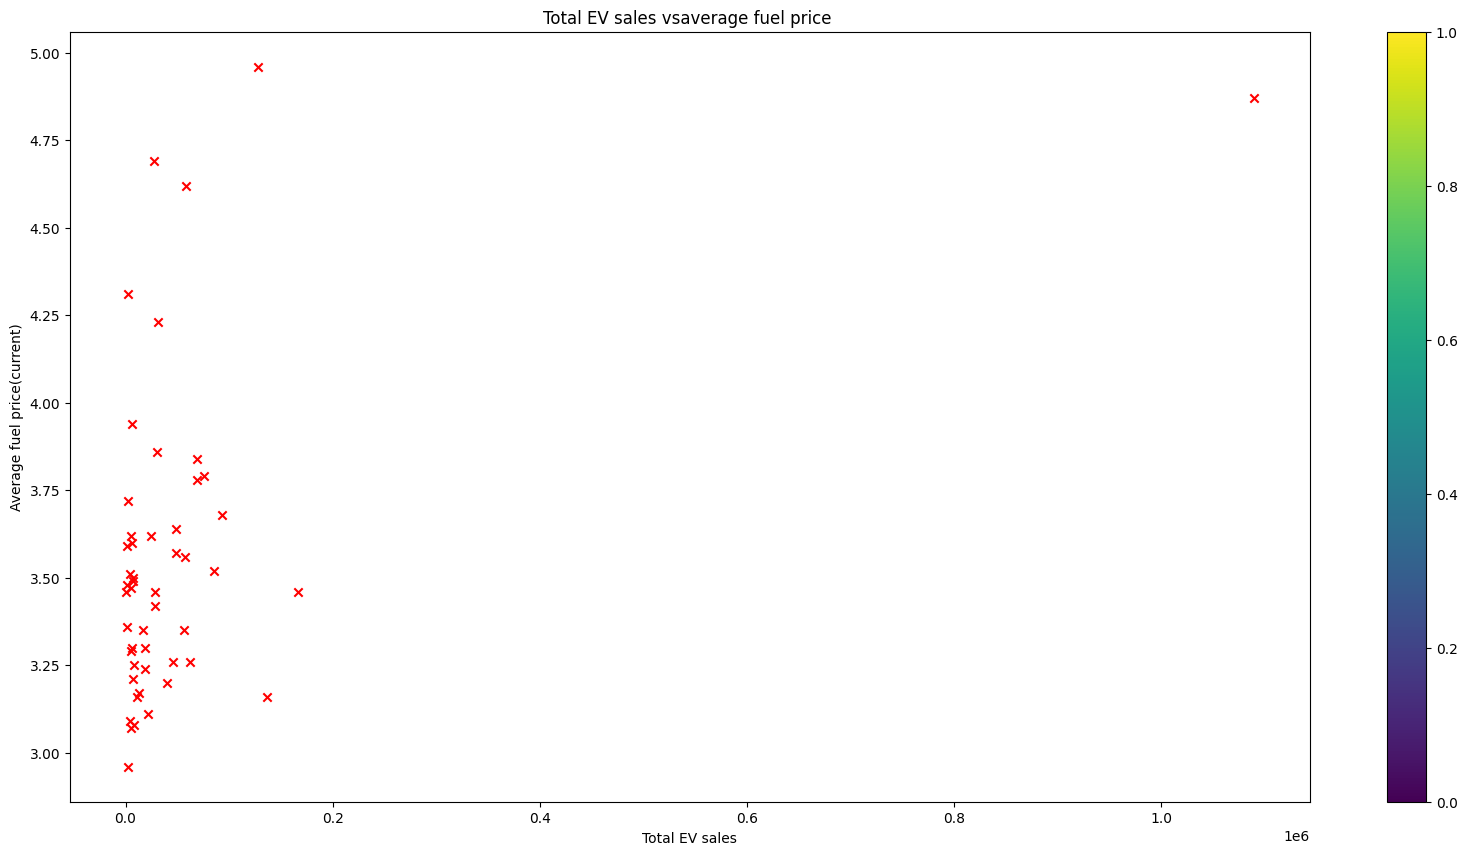

In [46]:
 #scatter plots of ev sales vs average fuel price
plt.figure(figsize=(20, 10))    

x_axis = final_file_df["Total EV"]

y_axis= (final_file_df["Average fuel price(current)"].str.replace("$" , "").astype(float))

plt.scatter(x_axis,y_axis,color="red",
    marker="x",)


plt.title('Total EV sales vsaverage fuel price ')
plt.xlabel('Total EV sales')
plt.ylabel('Average fuel price(current)')
plt.colorbar()

plt.show()



In [47]:
#corealltaion


correlation = st.pearsonr(final_file_df['Average fuel price(current)'].str.replace("$" , "").astype(float) , final_file_df['Total EV'])
print(f"The correlation between both factors is {round(correlation[0],2)}")






The correlation between both factors is 0.46


# scatter plots of ev sales vs charging ports and show corellation.

The correlation between Ev sales and charging ports 0.99


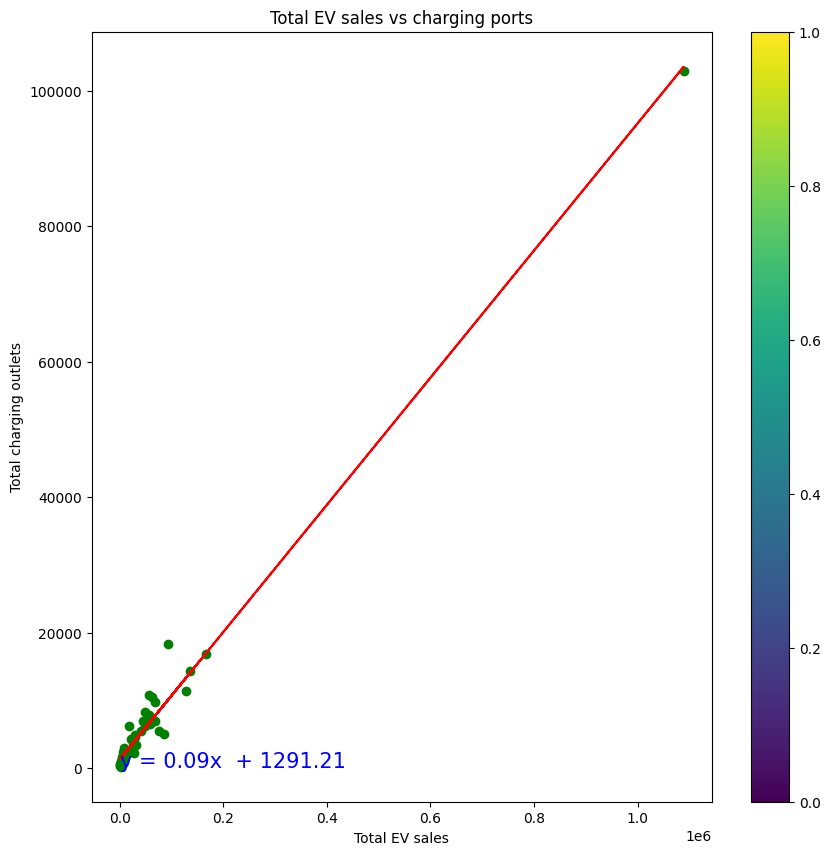

In [48]:
#scatter plots of ev sales vs charging ports and show corellation.

plt.figure(figsize=(10, 10))  

x_axis=final_file_df['Total EV']
y_axis= final_file_df['Total charging outlets']

#plt.scatter(xaxis,yaxis,color="green",
 #   marker="*",)
    
    
correlation = st.pearsonr(x_axis,y_axis)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_axis,y_axis)
regress_values = x_axis*slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x  + " + str(round(intercept,2))
plot = plt.scatter(x_axis,y_axis,color="green",)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0.4,100),fontsize=15,color = "blue")    


plt.title('Total EV sales vs charging ports')
plt.xlabel('Total EV sales')
plt.ylabel('Total charging outlets')
plt.colorbar()
print(f"The correlation between Ev sales and charging ports {round(correlation[0],2)}")


plt.savefig('Output_Data/EV sales vs charging ports1_plot.png')
#correlation = st.pearsonr()
#print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()



In [49]:
#Total EV sales = final_file_df.iloc[:,4]
#Total charging outlets = final_file_df.iloc[:,9]
correlation = st.pearsonr(final_file_df['Total EV'],final_file_df['Total charging outlets'])
print(f"The correlation between both factors is {round(correlation[0],2)}")




The correlation between both factors is 0.99


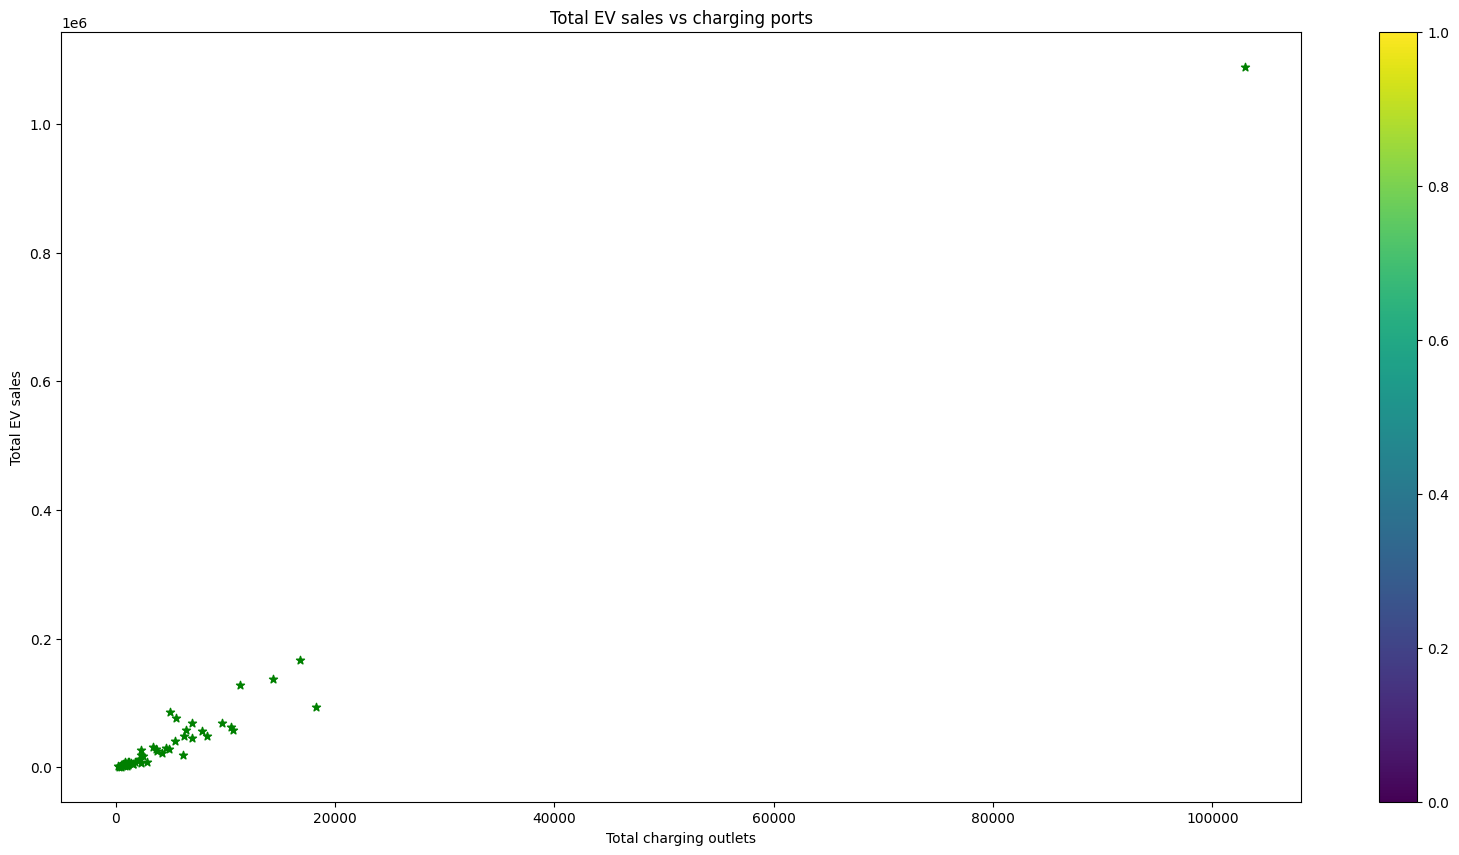

In [50]:

plt.figure(figsize=(20, 10))  

xaxis= final_file_df['Total charging outlets']
yaxis= final_file_df['Total EV']
plt.scatter(xaxis,yaxis,color="green",
    marker="*",)


plt.title('Total EV sales vs charging ports')
plt.xlabel('Total charging outlets')
plt.ylabel('Total EV sales')
plt.colorbar()
#correlation = st.pearsonr()
#print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [51]:
correlation = st.pearsonr(final_file_df['Total EV'],final_file_df['Total charging outlets'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.99
